<a href="https://colab.research.google.com/github/khadija-AI-1208/ML-project/blob/main/cust_churn_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install kaggle and upload kaggle.json to access Kaggle datasets
!pip install -q kaggle

from google.colab import files
files.upload()  # Upload your kaggle.json here

import os
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')
os.chmod('/root/.kaggle/kaggle.json', 600)

# Download and unzip the dataset
!kaggle datasets download -d barun2104/telecom-churn
!unzip -o telecom-churn.zip

# Load dataset with pandas
import pandas as pd
df = pd.read_csv('telecom_churn.csv')
df.head()


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/barun2104/telecom-churn
License(s): copyright-authors
  0% 0.00/45.5k [00:00<?, ?B/s]
100% 45.5k/45.5k [00:00<00:00, 107MB/s]
Archive:  telecom-churn.zip
  inflating: telecom_churn.csv       


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9250374812593704


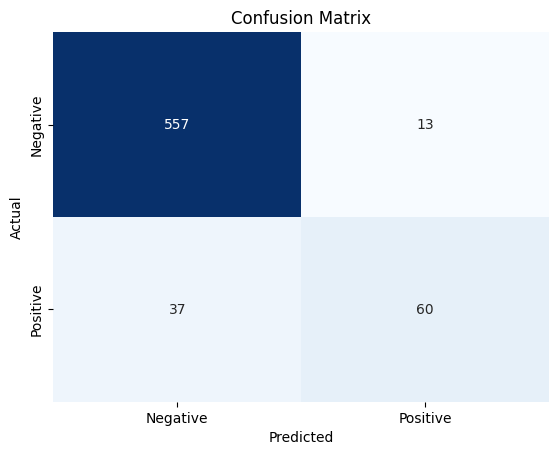

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


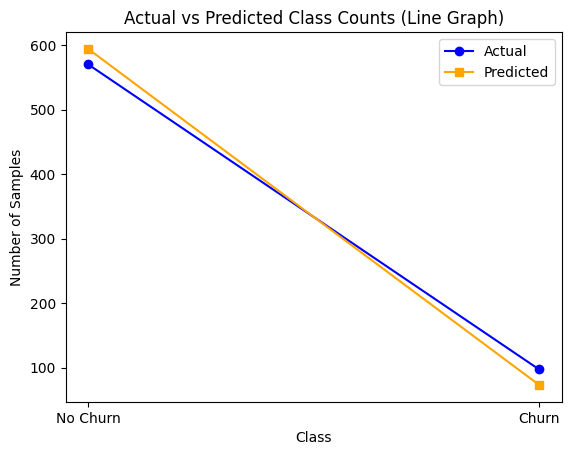

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

y_test_series = pd.Series(y_test)
y_pred_series = pd.Series(y_pred)

# Get class counts
actual_counts = y_test_series.value_counts().sort_index()
predicted_counts = y_pred_series.value_counts().sort_index()

# Class labels (assuming 0 = No Churn, 1 = Churn)
labels = ['No Churn', 'Churn']
actual_values = actual_counts.values
predicted_values = predicted_counts.values
plt.plot(labels, actual_values, marker='o', label='Actual', color='blue')
plt.plot(labels, predicted_values, marker='s', label='Predicted', color='orange')
# Styling
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Actual vs Predicted Class Counts (Line Graph)')
plt.legend()
plt.show()
